<a href="https://colab.research.google.com/github/leenu10/Exploratory-and-prediction-analysis-on-cars-dataset/blob/main/LeenuMathew_Vuelogix_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Auto Mpg Dataset.


# Importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset into the python environment.

In [ ]:
## Loading the mpg dataset from seaborn.

data = sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


The data is concerned on the Fuel consumption in Automobiles.

# Exploratory Data Analysis.
This part involves extracting meaningful insights from the data and presenting them using plots and graphs. This includes descriptive and diagnostic analysis, so as to find answers to the questions 'What happened?' and 'Why did it happen?' respectively.

In [ ]:
# checking the shape of the dataset
data.shape

(398, 9)

The dataset consists of 398 rows and 9 columns or attributes.

In [ ]:
# printing the attributes
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## Feature Description

1.  mpg - fuel efficiency measures in miles per gallon. *target variable
2.  cylinders - number of cylinders in the engine.
1.  displacement - engine displacement (in cubic inches).
1.  horsepower - engine horsepower.
1.  weight - vehicle weight (in pounds).
1.  acceleration - time to accelerate from 0 to 60 mph (in seconds).
1.  model_year - model year.
1.  origin - place of origin of the vehicle.
2.  name - vehicle name.












In [ ]:
# basic information on the dataset like the datatypes of the variables and number of non-null values etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


As observed, there are variables with continuous, discrete and categorical datatypes. Also 'horsepower' contains null values.

In [ ]:
# Quantitative variables(continuous).
print('The continuous variables are:',list(data.select_dtypes(include=['float64']).columns))
# Quantitative variables(discrete).
print('\nThe discrete variables are:',list(data.select_dtypes(include=['int64']).columns))
# Categorical variables.
print('\nThe categorical variables are:',list(data.select_dtypes(include=['object']).columns))

The continuous variables are: ['mpg', 'displacement', 'horsepower', 'acceleration']

The discrete variables are: ['cylinders', 'weight', 'model_year']

The categorical variables are: ['origin', 'name']


Since the 'cylinders' and 'model_year' are not relevant for further computations like calculating mean and std, they can also be regarded as categorical variables.

## Handling the missing values

In [ ]:
missing = data.isna().sum()
missing

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are six missing values in 'horsepower'.

In [ ]:
# percentage of the missing value in the column.
missing[missing>0]/len(data)*100

horsepower    1.507538
dtype: float64

We can either remove these datapoints since the missing values comprises only 1.5% or we can fill those values with appropriate entries like mean, median etc. For that we have to look the attribute's distribution through a histogram. If it is normally distributed, mean can be used to fill those values. On the other hand, if it is skewed, median or mode will be appropriate, since mean is adversely affected by extreme values and hence by a skewed data.

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

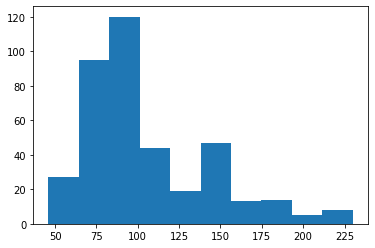

In [ ]:
plt.hist(data['horsepower'])

The distribution of 'horsepower' is negatively skewed. So, either median or mode can be used to fill the missing values.

In [ ]:
# Displaying the part of the dataset with the missing values.
data[data.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
# Extracting out the indices containing the missing values.
data[data['horsepower'].isna()].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

### Dropping the missing values.

In [ ]:
# Dropping the indices with the missing values.
data.drop([32, 126, 330, 336, 354, 374], inplace=True)


In [ ]:
data.iloc[[32, 126, 330, 336, 354, 374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin
128,15.0,6,250.0,100.0,3336,17.0,74,usa,chevrolet nova
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
340,25.8,4,156.0,92.0,2620,14.4,81,usa,dodge aries wagon (sw)
359,28.1,4,141.0,80.0,3230,20.4,81,europe,peugeot 505s turbo diesel
380,36.0,4,120.0,88.0,2160,14.5,82,japan,nissan stanza xe


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.iloc[[32, 126, 330, 336, 354, 374]]

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin
126,128,15.0,6,250.0,100.0,3336,17.0,74,usa,chevrolet nova
330,333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
336,340,25.8,4,156.0,92.0,2620,14.4,81,usa,dodge aries wagon (sw)
354,359,28.1,4,141.0,80.0,3230,20.4,81,europe,peugeot 505s turbo diesel
374,380,36.0,4,120.0,88.0,2160,14.5,82,japan,nissan stanza xe


In [ ]:
data.drop('index', axis=1, inplace=True)

In [ ]:
data.iloc[[32, 126, 330, 336, 354, 374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin
126,15.0,6,250.0,100.0,3336,17.0,74,usa,chevrolet nova
330,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
336,25.8,4,156.0,92.0,2620,14.4,81,usa,dodge aries wagon (sw)
354,28.1,4,141.0,80.0,3230,20.4,81,europe,peugeot 505s turbo diesel
374,36.0,4,120.0,88.0,2160,14.5,82,japan,nissan stanza xe


In [ ]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
data.shape

(392, 9)

The rows of the data reduced to 392.

## Checking whether there is any duplicate rows.

In [ ]:
data.duplicated().sum()

0

Hence, there are no duplicate rows in the data.

## Rearranging the data into a much cleaner way.

In [ ]:
cats = pd.DataFrame(data[['origin', 'name', 'model_year', 'cylinders']])
nums = pd.DataFrame(data[['weight', 'displacement', 'horsepower', 'acceleration', 'mpg']])
data = pd.concat([cats,nums], axis=1)
data.head()

,origin,name,model_year,cylinders,weight,displacement,horsepower,acceleration,mpg
0,usa,chevrolet chevelle malibu,70,8,3504,307.0,130.0,12.0,18.0
1,usa,buick skylark 320,70,8,3693,350.0,165.0,11.5,15.0
2,usa,plymouth satellite,70,8,3436,318.0,150.0,11.0,18.0
3,usa,amc rebel sst,70,8,3433,304.0,150.0,12.0,16.0
4,usa,ford torino,70,8,3449,302.0,140.0,10.5,17.0


In [ ]:
data.shape

(392, 9)

## Handling Outliers

### defining a function for handling the outliers.

In [ ]:
def outliers(x):
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outlier_values = x[(x<min_range) | (x>max_range)]
    return outlier_values

### Checking for outliers.

In [ ]:
for col in nums:
    outlier_values = outliers(nums[col])
    if len(outlier_values):
        print(f"* {col} has these outliers,\n{outlier_values}\n")
    else:
        print(f"* {col} doesn't have any outliers.\n")

* weight doesn't have any outliers.

* displacement doesn't have any outliers.

* horsepower has these outliers,
6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
27     210.0
66     208.0
93     215.0
94     225.0
115    230.0
Name: horsepower, dtype: float64

* acceleration has these outliers,
7       8.5
9       8.5
11      8.0
58     23.5
193    22.2
194    22.1
207    21.9
297    24.8
298    22.2
324    23.7
388    24.6
Name: acceleration, dtype: float64

* mpg doesn't have any outliers.



In [ ]:
data.iloc[list(outliers(nums['acceleration']).index)]

,origin,name,model_year,cylinders,weight,displacement,horsepower,acceleration,mpg
7,usa,plymouth fury iii,70,8,4312,440.0,215.0,8.5,14.0
9,usa,amc ambassador dpl,70,8,3850,390.0,190.0,8.5,15.0
11,usa,plymouth 'cuda 340,70,8,3609,340.0,160.0,8.0,14.0
58,europe,volkswagen type 3,72,4,2254,97.0,54.0,23.5,23.0
193,usa,chevrolet chevette,76,4,2035,85.0,52.0,22.2,29.0
194,usa,chevrolet woody,76,4,2164,98.0,60.0,22.1,24.5
207,europe,peugeot 504,76,4,3270,120.0,88.0,21.9,19.0
297,europe,peugeot 504,79,4,3190,141.0,71.0,24.8,27.2
298,usa,oldsmobile cutlass salon brougham,79,8,3420,260.0,90.0,22.2,23.9
324,europe,vw dasher (diesel),80,4,2335,90.0,48.0,23.7,43.4


In [ ]:
data.iloc[list(outliers(nums['horsepower']).index)]

,origin,name,model_year,cylinders,weight,displacement,horsepower,acceleration,mpg
6,usa,chevrolet impala,70,8,4354,454.0,220.0,9.0,14.0
7,usa,plymouth fury iii,70,8,4312,440.0,215.0,8.5,14.0
8,usa,pontiac catalina,70,8,4425,455.0,225.0,10.0,14.0
13,usa,buick estate wagon (sw),70,8,3086,455.0,225.0,10.0,14.0
25,usa,ford f250,70,8,4615,360.0,215.0,14.0,10.0
27,usa,dodge d200,70,8,4382,318.0,210.0,13.5,11.0
66,usa,mercury marquis,72,8,4633,429.0,208.0,11.0,11.0
93,usa,chrysler new yorker brougham,73,8,4735,440.0,215.0,11.0,13.0
94,usa,buick electra 225 custom,73,8,4951,455.0,225.0,11.0,12.0
115,usa,pontiac grand prix,73,8,4278,400.0,230.0,9.5,16.0


The outliers in 'acceleration' uses engines with 8 and 4 cylinders and all the outliers of 'horsepower', are low_mpg engines produced in USA, in the year 1970's, with 8 cylinder engines.

### Dropping the indices with the outlier values.

In [ ]:
outliers_list = list(outliers(nums['horsepower']).index) + list(outliers(nums['acceleration']).index)
data.drop(outliers_list, inplace=True)
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

In [ ]:
data.shape

(372, 9)

In [ ]:
cats = data[['origin', 'name', 'model_year', 'cylinders']]
nums = data[['weight', 'displacement', 'horsepower', 'acceleration', 'mpg']]
print(cats.shape)
print(nums.shape)

(372, 4)
(372, 5)


## Count plot of categorical variables.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


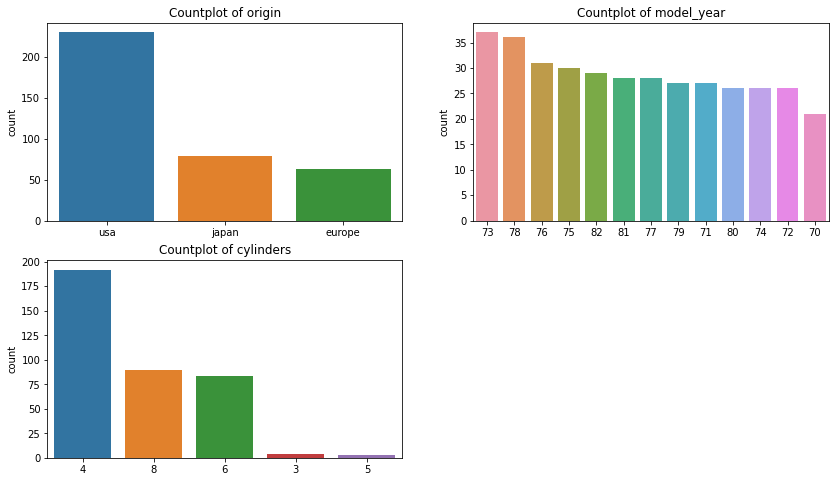

In [ ]:
plt.figure(1,figsize=(14,8))
for i, cat in enumerate(cats.drop('name', axis=1).columns):
  plt.subplot(2,2,i+1)
  sns.countplot(cats[cat], order=cats[cat].value_counts().index)
  plt.xlabel(None)
  plt.title(f'Countplot of {cat}')
plt.show()

In [ ]:
for i in cats.drop('name', axis=1).columns:
   df = pd.DataFrame(cats[i].value_counts()).reset_index()
   df.columns = [i, 'count']
   df['percentage'] = list(round(cats[i].value_counts()/len(data)*100,2))
   print(df)

   origin  count  percentage
0     usa    230       61.83
1   japan     79       21.24
2  europe     63       16.94
    model_year  count  percentage
0           73     37        9.95
1           78     36        9.68
2           76     31        8.33
3           75     30        8.06
4           82     29        7.80
5           81     28        7.53
6           77     28        7.53
7           79     27        7.26
8           71     27        7.26
9           80     26        6.99
10          74     26        6.99
11          72     26        6.99
12          70     21        5.65
   cylinders  count  percentage
0          4    192       51.61
1          8     90       24.19
2          6     83       22.31
3          3      4        1.08
4          5      3        0.81


### Inference:

> The distribution of 'origin' and 'cylinders' are highly imbalanced, while that of model_year is balanced and almost uniformly distributed. 

> USA alone contributes to 61.83% of origin. While Japan and Europe contributes almost the same.

> the distribution of model_year tend to be uniform, though 73 is showing the highest in this sample contributing to 10% approx.

> 4 alone contributes to 51.61% of cylinders in the engine.

## Feature Engineering.

### Creation of the feature 'car_company'

In [ ]:
# unique values of the column 'name'.
data.name.nunique()

289

Since there are so many unique values in 'name'(more than three forth of the total data), it is not wise to include them in the analysis. But the car company may be similar for most of them. Usually the car company is denoted by the first word in the name. So, creating a new feature called 'car_company' and removing the feature 'name'.

In [ ]:
# Creating the new feature as a series datatype.
car_company = cats['name'].apply(lambda x: x.split()[0])
cats.insert(1, 'car_company', car_company)

# Dropping the 'name' column
cats.drop('name', axis=1, inplace=True)

cats.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,origin,car_company,model_year,cylinders
0,usa,chevrolet,70,8
1,usa,buick,70,8
2,usa,plymouth,70,8
3,usa,amc,70,8
4,usa,ford,70,8


In [ ]:
cats.car_company.nunique()

37

Thus successfully reduced the classes suitable for further analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


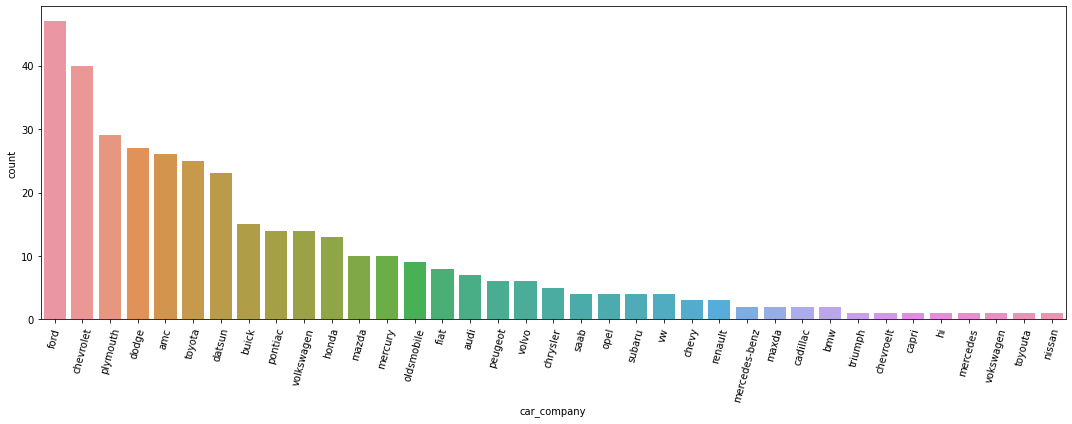

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(cats['car_company'], order=cats['car_company'].value_counts().index)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [ ]:
# Top 15 car companies in terms of cars sold.
cats['car_company'].value_counts()[:15]

ford          47
chevrolet     40
plymouth      29
dodge         27
amc           26
toyota        25
datsun        23
buick         15
pontiac       14
volkswagen    14
honda         13
mazda         10
mercury       10
oldsmobile     9
fiat           8
Name: car_company, dtype: int64

### Creation of the feature 'mpg_level'

(array([ 9., 70., 72., 56., 51., 47., 37., 22.,  4.,  4.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

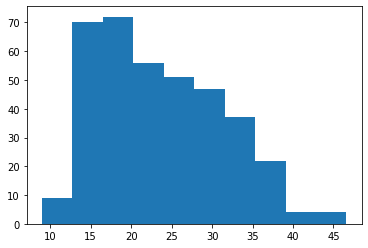

In [ ]:
plt.hist(data['mpg'])

In [ ]:
cats['mpg_level'] = data['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cats.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,origin,car_company,model_year,cylinders,mpg_level
0,usa,chevrolet,70,8,medium
1,usa,buick,70,8,low
2,usa,plymouth,70,8,medium
3,usa,amc,70,8,low
4,usa,ford,70,8,medium


## Analysing 'mpg_level' with 'cylinders' bifurcated with 'origin' 

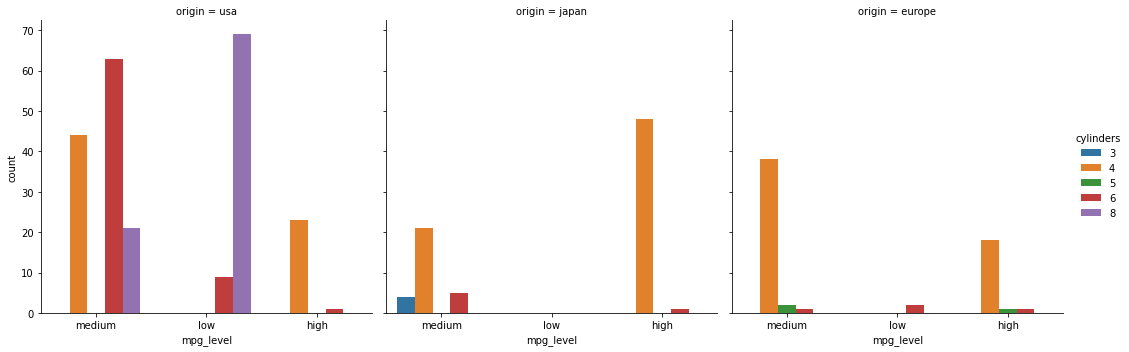

In [ ]:
sns.catplot(x='mpg_level', hue='cylinders', col='origin', data=cats, kind='count')
plt.show()

### Inference

> High mpg is mostly shown by engines with 4 cylinders. Low mpg is mainly observed on engines with 6 and 8 cylinders.

> Most of the low_mpg engines are produced by USA. Most of the engines produced by Japan and Europe are of medium_mpg and high_mpg. Interesting to note that no low_mpg engines are manufactured in Japan. Manufacturing of low_mpg engines are considerably low in Europe also.

> 8 cylinder engines are manufactured only by USA. Also USA contributes a high proportion of 6 cylinder engines. May be thats why most of the low_mpg engines falls under USA.

## Analysing the mpg_level with model_year

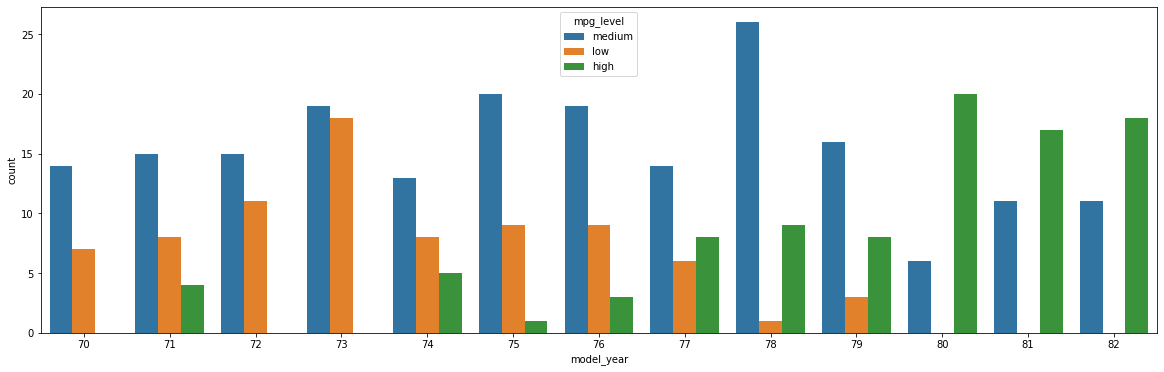

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='model_year', hue='mpg_level', data=cats)
plt.show()

### Insight:

> It can be clearly observed that the production of low_mpg engines is decreasing and that of high_mpg engines is increasing as years pass by.

> In the 80's no low_mpg engines are produced. Also the production of high_mpg engines became about 2 times that of even medium_mpg engines.





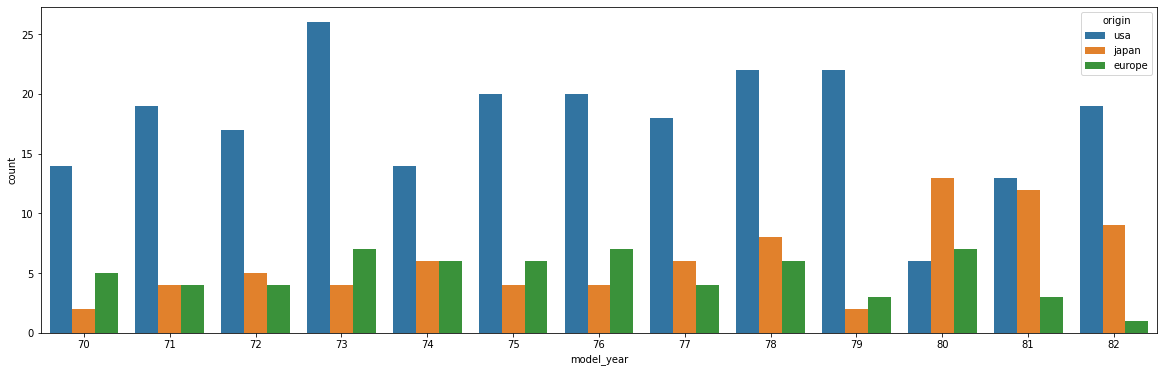

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='model_year', hue='origin', data=cats)
plt.show()

### Insight:

> The reason for the increase in high_mpg engines in the 80's is that Japan which uses much much of the 4 cylinder engines and producing most of the high_mpg engines increased their production in the 80's.



## Summary Statistics of the data

In [ ]:
# the numerical features are:
nums.head()

,weight,displacement,horsepower,acceleration,mpg
0,3504,307.0,130.0,12.0,18.0
1,3693,350.0,165.0,11.5,15.0
2,3436,318.0,150.0,11.0,18.0
3,3433,304.0,150.0,12.0,16.0
4,3449,302.0,140.0,10.5,17.0


In [ ]:
nums.describe()

,weight,displacement,horsepower,acceleration,mpg
count,372.000000,372.000000,372.000000,372.000000,372.000000
mean,2944.045699,188.939516,101.879032,15.546237,23.652688
std,829.283502,98.717407,33.661689,2.402304,7.632497
min,1613.000000,68.000000,46.000000,9.500000,9.000000
25%,2220.000000,105.000000,75.750000,14.000000,17.600000
50%,2764.500000,146.000000,92.000000,15.500000,23.000000
75%,3542.000000,258.000000,120.000000,17.000000,29.125000
max,5140.000000,429.000000,200.000000,21.800000,46.600000


## Graphical Representation of the distribution of the numerical variables.

### Visual Normality check.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

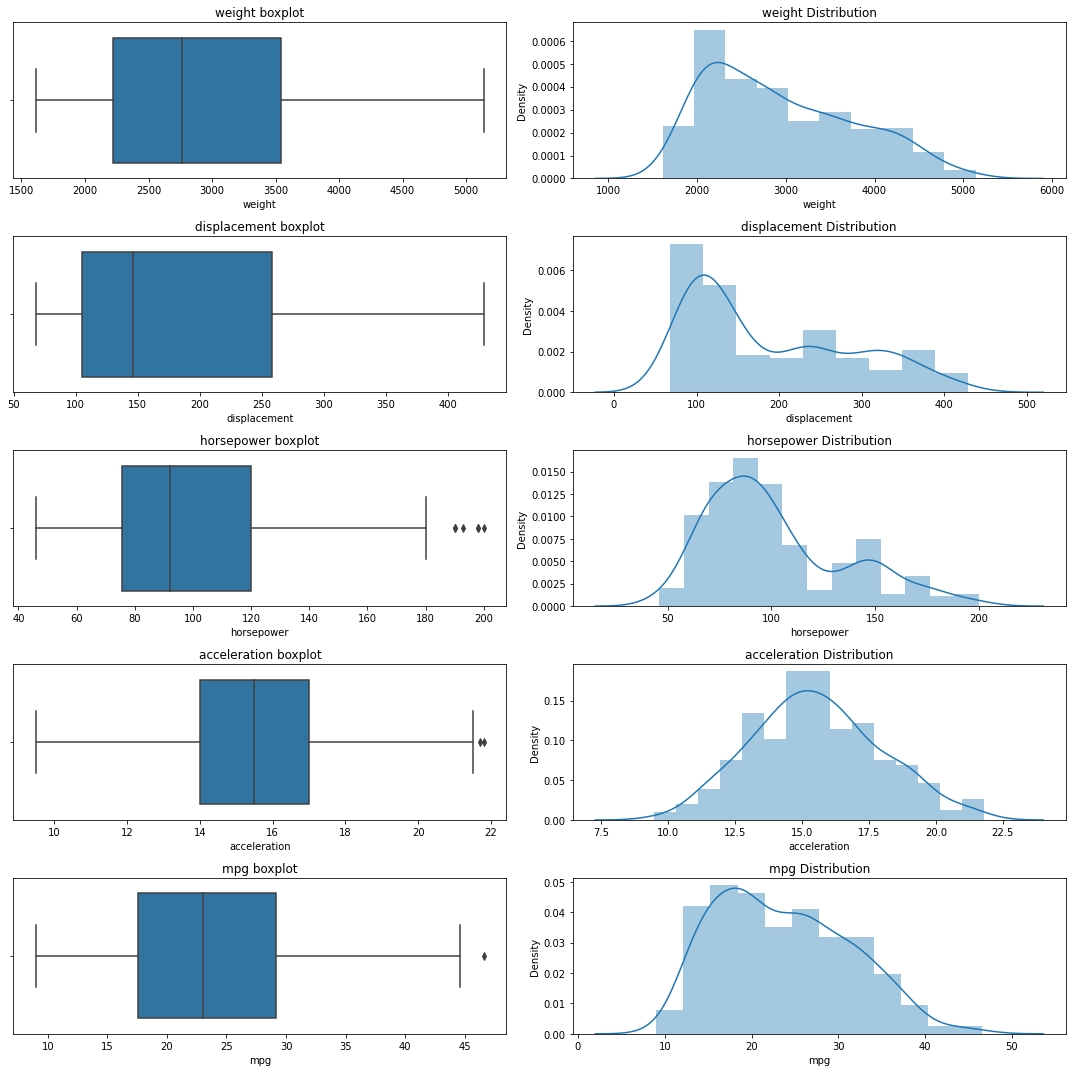

In [ ]:
plt.figure(figsize=(15,15))

i=0
for col in nums.columns:
  i+=1
  plt.subplot(5,2,i)
  sns.boxplot(nums[col], orient='h')
  plt.title(f'{col} boxplot')
  plt.tight_layout()

  i+=1
  plt.subplot(5,2,i)
  sns.distplot(nums[col])
  plt.title(f'{col} Distribution')
  plt.tight_layout()

plt.show()

### Inference:


> Here, 'acceleration' is the only normally distributed data variable.

> 'weight' and 'mpg' are observed to be right skewed.

> 'horsepower' and 'displacement' do not satisfy normality.





### Normalizing the numerical data.

In [ ]:
nums_array = normalize(nums)
nums = pd.DataFrame(nums_array, columns=nums.columns)
nums.head()

,weight,displacement,horsepower,acceleration,mpg
0,0.995485,0.087219,0.036933,0.003409,0.005114
1,0.994543,0.094257,0.044435,0.003097,0.004040
2,0.994787,0.092067,0.043428,0.003185,0.005211
3,0.995143,0.088122,0.043481,0.003479,0.004638
4,0.995358,0.087155,0.040403,0.003030,0.004906


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

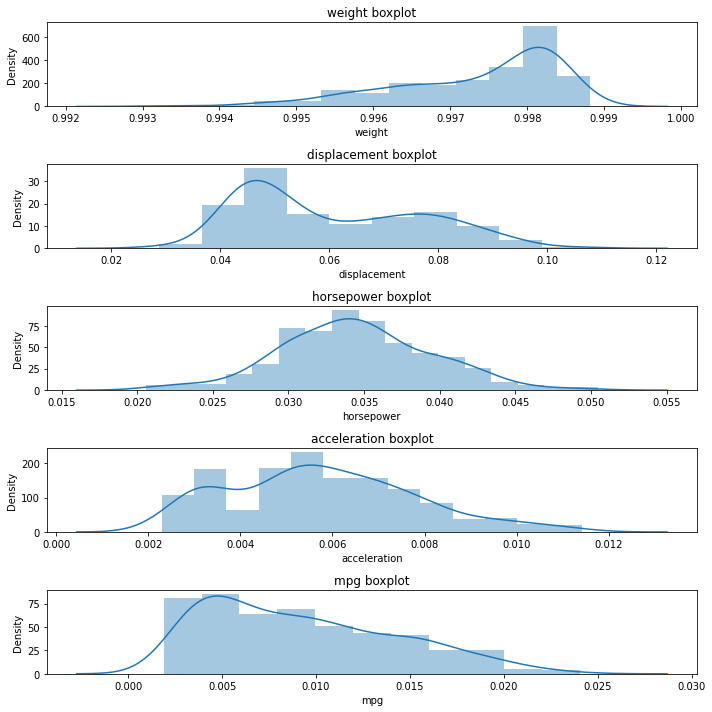

In [ ]:
plt.figure(figsize=(10,10))

for i,col in enumerate(nums.columns):
  plt.subplot(5,1,i+1)
  sns.distplot(nums[col])
  plt.title(f'{col} boxplot')
  plt.tight_layout()
plt.show() 

## Correlation Analysis.

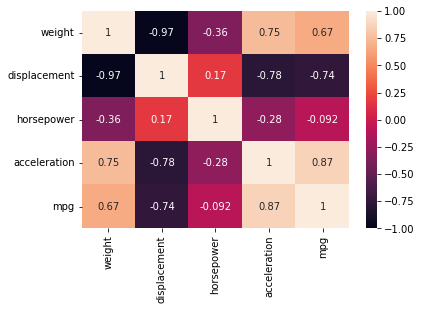

In [ ]:
sns.heatmap(nums.corr(), annot=True, vmin=-1, vmax=1)

### Inference:
By default it calculates the pearsons correlation coefficient, which ranges from -1 to 1. Those values less than -0.5 are regarded as high negative correlation, while those above 0.5 are regarded as high positive correlation.


> High positive correlation is observed between,

*   weight and acceleration (0.75) - more the weight, more is the acceleration.
*   weight and mpg (0.67) - more the weight, more is the mpg.
*   acceleration and mpg (0.87) - more the acceleration, more is the mpg.




> High negative correlation is observed between,

*   weight and displacement (-0.97) - more the weight, less is the displacement.
*   displacement and mpg (-0.74) - more the displacement, less is the mpg.
*   displacement and acceleration (-0.78) - more the horsepower, less is the mpg.












### Pairplot for analysing correlation.

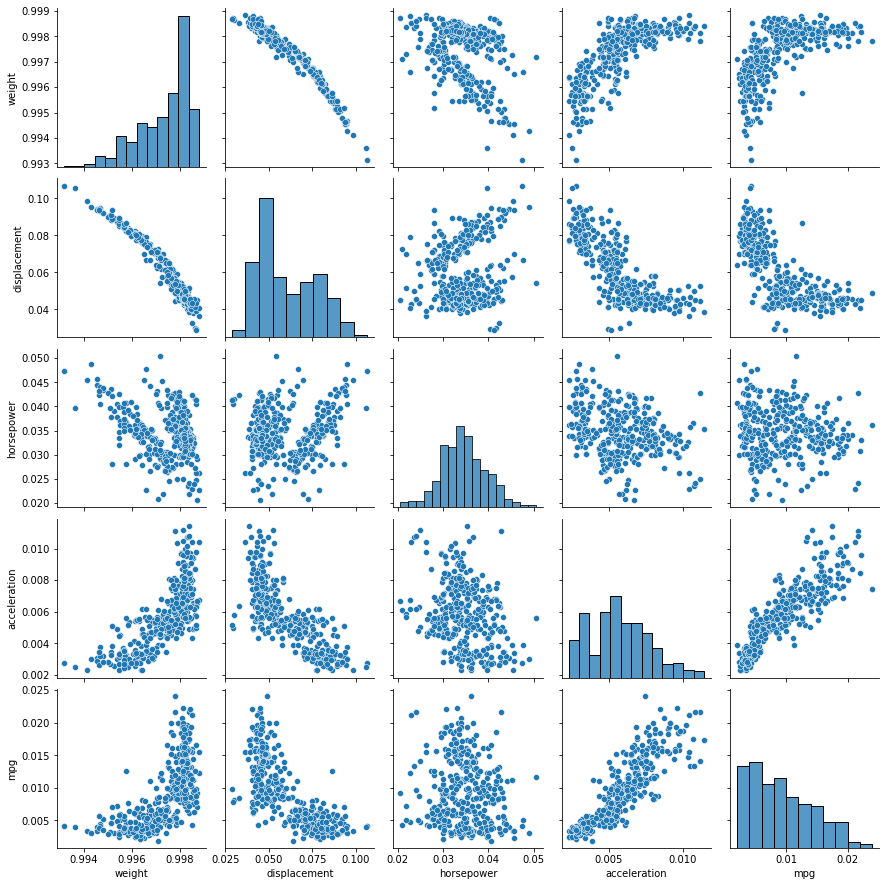

In [ ]:
sns.pairplot(nums)

The same mentioned above can be observed in this plot.

## Scaling of the numerical data.

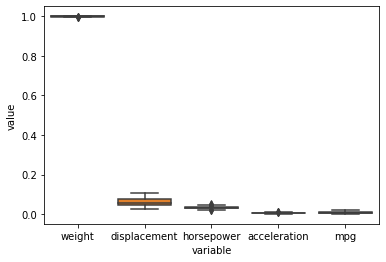

In [ ]:
sns.boxplot(x="variable", y="value", data = pd.melt(nums))

As seen above weight is measured in a very large quantity compared to the measurement of the other variables. Hence scaling should be done to all feature variables inorder for the prediction model to be more effective.

### Standard Scaling

In [ ]:
sc = StandardScaler()
nums[['weight', 'displacement', 'horsepower', 'acceleration']] = sc.fit_transform(nums.drop('mpg', axis=1))
nums.head()

,weight,displacement,horsepower,acceleration,mpg
0,-1.722264,1.625474,0.493806,-1.175159,0.005114
1,-2.589551,2.051335,1.994052,-1.330783,0.004040
2,-2.365176,1.918840,1.792586,-1.287065,0.005211
3,-2.036965,1.680150,1.803292,-1.140607,0.004638
4,-1.839090,1.621636,1.187725,-1.364071,0.004906


## Encoding the categorical variables.

###Encoding of 'origin'

In [ ]:
le = LabelEncoder()
cats['origin'] = le.fit_transform(cats['origin'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)
cats.head()

{'europe': 0, 'japan': 1, 'usa': 2}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,origin,car_company,model_year,cylinders,mpg_level
0,2,chevrolet,70,8,medium
1,2,buick,70,8,low
2,2,plymouth,70,8,medium
3,2,amc,70,8,low
4,2,ford,70,8,medium


### Encoding of car_company

In [ ]:
le = LabelEncoder()
cats['car_company'] = le.fit_transform(cats['car_company'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)
cats.head()

{'amc': 0, 'audi': 1, 'bmw': 2, 'buick': 3, 'cadillac': 4, 'capri': 5, 'chevroelt': 6, 'chevrolet': 7, 'chevy': 8, 'chrysler': 9, 'datsun': 10, 'dodge': 11, 'fiat': 12, 'ford': 13, 'hi': 14, 'honda': 15, 'maxda': 16, 'mazda': 17, 'mercedes': 18, 'mercedes-benz': 19, 'mercury': 20, 'nissan': 21, 'oldsmobile': 22, 'opel': 23, 'peugeot': 24, 'plymouth': 25, 'pontiac': 26, 'renault': 27, 'saab': 28, 'subaru': 29, 'toyota': 30, 'toyouta': 31, 'triumph': 32, 'vokswagen': 33, 'volkswagen': 34, 'volvo': 35, 'vw': 36}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,origin,car_company,model_year,cylinders,mpg_level
0,2,7,70,8,medium
1,2,3,70,8,low
2,2,25,70,8,medium
3,2,0,70,8,low
4,2,13,70,8,medium


# Predictive Analysis.

For Predicting the target variable based on the feature variables.

### Feature selection for model building.

In [ ]:
cats = cats[['origin', 'car_company', 'model_year', 'cylinders']]

data = pd.concat([cats, nums], axis=1)
data.head()

,origin,car_company,model_year,cylinders,weight,displacement,horsepower,acceleration,mpg
0,2,7,70,8,-1.722264,1.625474,0.493806,-1.175159,0.005114
1,2,3,70,8,-2.589551,2.051335,1.994052,-1.330783,0.004040
2,2,25,70,8,-2.365176,1.918840,1.792586,-1.287065,0.005211
3,2,0,70,8,-2.036965,1.680150,1.803292,-1.140607,0.004638
4,2,13,70,8,-1.839090,1.621636,1.187725,-1.364071,0.004906


## Linear Regression Model

### Splitting the data into feature and target variables.

In [ ]:
x = pd.DataFrame(data.drop('mpg', axis=1))
y = pd.DataFrame(data['mpg'])

### Splitting the data into train and test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

### Building the model.

In [ ]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(f'The Mean Square Error of the Model is: {mean_squared_error(y_test, y_pred)}')
print(f'The R_square value of the model is: {r2_score(y_test, y_pred)}')

The Mean Square Error of the Model is: 2.6711614780861472e-06
The R_square value of the model is: 0.9021705218889827


### Inference:

The accuracy of the model can be explained in terms of the R_square value. It means 90.2% of the variation in the target variable is explained by the feature variables in this model. So, the model works pretty good.